In [24]:
import uproot
import numpy as np
import os
liczba = os.popen('cd traning/signal; find -type f | wc -l').read()
liczba2 = int(liczba)

In [25]:
import glob
file_pattern = "traning/signal/*.root"
files = glob.glob(file_pattern)

In [26]:
branch_list = [uproot.open(files[i])['nominal'].arrays(library="np") for i in range (liczba2) ]

In [27]:
combined_data = {}

In [28]:
def delete_branches(branches):
    del branches['jet_isbtagged_DL1r_77']
    del branches['mc_kFactor']
    del branches['RunYear']
    del branches['mc_rawXSection']
    del branches['lep_ID_0']
    del branches['p_Event_No']
    del branches['jet_pt']
    del branches['jet_eta']
    del branches['jet_phi']
    del branches['jet_e']
    del branches['lep_vz_0']
    del branches['lep_vz_1']
    del branches['taus_DL1r_0']
    del branches['p_sumElepAll_EJet']
    del branches['p_sumPtleptauAll_Ptjet']

In [29]:
for i in branch_list:
    delete_branches(i)
    

In [30]:
keys = list(branch_list[0])

In [31]:
keys

['lep_Pt_0',
 'lep_E_0',
 'lep_Eta_0',
 'lep_Phi_0',
 'lep_EtaBE2_0',
 'lep_sigd0PV_0',
 'lep_Z0SinTheta_0',
 'lep_d0_0',
 'lep_z0_0',
 'lep_deltaz0_0',
 'lep_RadiusCO_0',
 'lep_RadiusCOX_0',
 'lep_RadiusCOY_0',
 'lep_SeparationMinDCT_0',
 'lep_ClosestSiTracknIL_0',
 'lep_ClosestSiTrackeIL_0',
 'lep_ClosestSiTracknNIL_0',
 'lep_ClosestSiTrackeNIL_0',
 'lep_BestMatchTrackEta_0',
 'lep_BestMatchTrackPhi_0',
 'lep_BestMatchTrackD0_0',
 'lep_BestMatchTrackZ0_0',
 'lep_BestMatchTrackQ_0',
 'lep_ClosestSiTrackEta_0',
 'lep_ClosestSiTrackD0_0',
 'lep_ClosestSiTrackZ0_0',
 'lep_ClosestSiTrackQ_0',
 'lep_chargeIDBDTLoose_0',
 'lep_ID_1',
 'lep_Pt_1',
 'lep_E_1',
 'lep_Eta_1',
 'lep_Phi_1',
 'lep_EtaBE2_1',
 'lep_sigd0PV_1',
 'lep_Z0SinTheta_1',
 'lep_d0_1',
 'lep_z0_1',
 'lep_deltaz0_1',
 'lep_RadiusCO_1',
 'lep_RadiusCOX_1',
 'lep_RadiusCOY_1',
 'lep_SeparationMinDCT_1',
 'lep_ClosestSiTracknIL_1',
 'lep_ClosestSiTrackeIL_1',
 'lep_ClosestSiTracknNIL_1',
 'lep_ClosestSiTrackeNIL_1',
 'lep_Best

In [8]:
'''
k = 0
l = 0
for key in keys:
    for i in range(len(branches3[key])):
        if (np.array_equal(branches3[key][i], branches4[key][i])):
            k += 1
        else:
            l += 1

print(k)
print(l)
'''

'\nk = 0\nl = 0\nfor key in keys:\n    for i in range(len(branches3[key])):\n        if (np.array_equal(branches3[key][i], branches4[key][i])):\n            k += 1\n        else:\n            l += 1\n\nprint(k)\nprint(l)\n'

In [32]:
def join_branchKey(arr):
    combo = arr
    if len(arr) > 1:
        combo = np.concatenate([arr[0], arr[1]])
        for i in range(len(arr)):
            combo = np.concatenate([combo, arr[i]])
    return combo

In [33]:
def join_branch(branch):
    for key in keys:
        if all(isinstance(item, np.ndarray) for item in branch[key]):
            branch[key] = join_branchKey(branch[key])
    return branch

In [34]:
for i in range(len(branch_list)):
    branch_list[i] = join_branch(branch_list[i])

In [35]:
combined_data

{}

In [36]:
for i in keys:
    combo = np.concatenate([branch_list[0][i], np.array([])])
    for k in branch_list:
        combo = np.concatenate([combo, k[i]])
    combined_data[i] = combo
    try:
        combined_data[i] = combined_data[i].astype(np.float32)
    except ValueError:
        print(i)

In [37]:
combined_data = join_branch(combined_data)

In [38]:
def minus_value_filter(keys, branch):
    try:
        for key in keys:
            min = np.min(branch[key])
            max = np.max(branch[key])
            distance = abs(max - min)
            for i in range(len(branch[key])):
                branch[key][i] = branch[key][i] + distance
        return branch
    except ValueError:
        print(key)

In [39]:
combined_data = minus_value_filter(keys, combined_data)


In [40]:
def norm(keys, branch):
    
    maxes = {}
    mins = {}
    
    for key in keys:
        max = np.max(branch[key])
        min = np.min(branch[key])
        
        
        for i in range(len(branch[key])):
            if max != 0:
                branch[key][i] = branch[key][i] / max
        if(max != 0):
            maxes[key] = max / max    
            mins[key] = min / max
        
        
    return [branch, maxes, mins]

In [41]:
combined_data = norm(keys, combined_data)[0]

In [42]:
import matplotlib.pyplot as plt

In [43]:
def bins(n, list):
    bins = []
    
    list = sorted(list)
    
    last = list[-1]
    k = np.min(list)
    while k < last:
        bins.append(k)
        k += (last - list[0])/n
    
    
    return bins

In [44]:
def cuting(list):
    mean = np.mean(list)
    std = np.std(list)
    
    filtred = []
    
    max_list = []
    min_list = []
    
    max_plus = mean + 5*std
    max_minus = mean - 5*std
    for i in range(len(list)):
        if(list[i] <= max_plus and list[i] >= max_minus):
            filtred.append(list[i])
        elif (list[i] >= max_plus):
          max_list.append(list[i])
        elif (list[i] <= max_minus):
            min_list.append(list[i])
    if (len(max_list) > 0):
        cut_max = np.min(max_list)
    else:
        cut_max = np.max(filtred)
    if(len(min_list) > 0):
        cut_min = np.max(min_list)
    else:
        cut_min = np.min(filtred)
    
    
    return [np.array(filtred), cut_max, cut_min]

In [45]:
globals_max = {}
globals_min = {}

for key in keys:
    try:
        cut = cuting(combined_data[key])
        combined_data[key] = cut[0]
        globals_max[key] = cut[1]
        globals_min[key] = cut[2]
    except ValueError:
        print(key)

In [46]:
def paint(key, m, list):
    fig = plt.figure()
    biny = bins(m, list)
    plt.hist(combined_data[key], bins=biny)
    plt.title(key)
    return fig

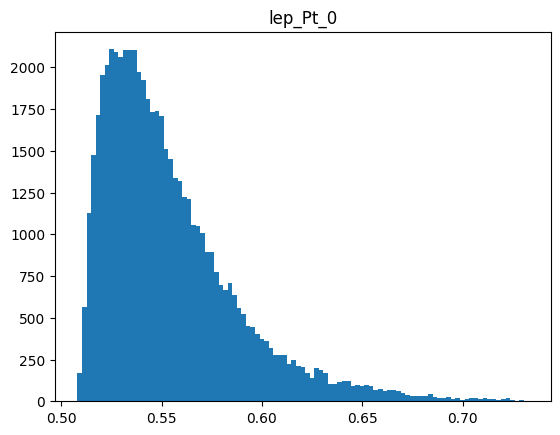

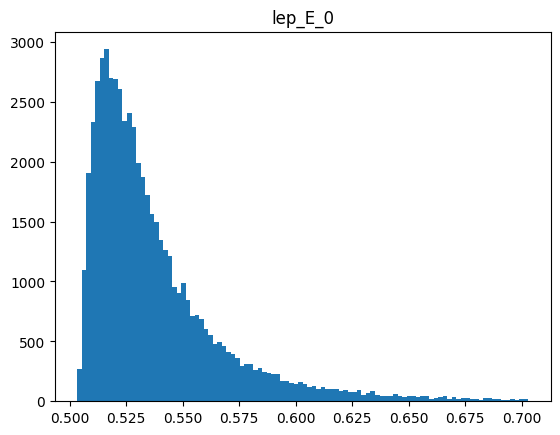

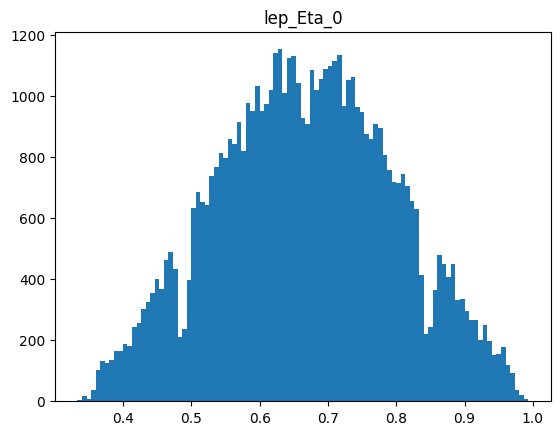

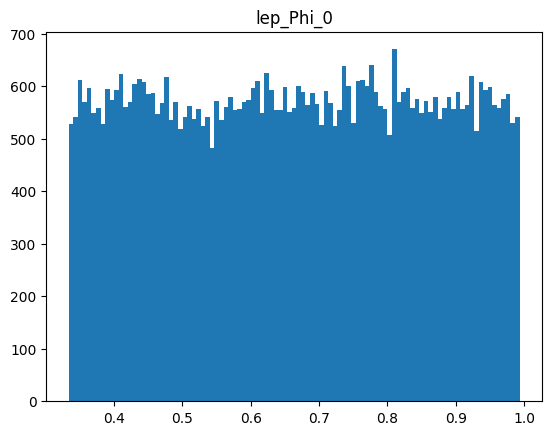

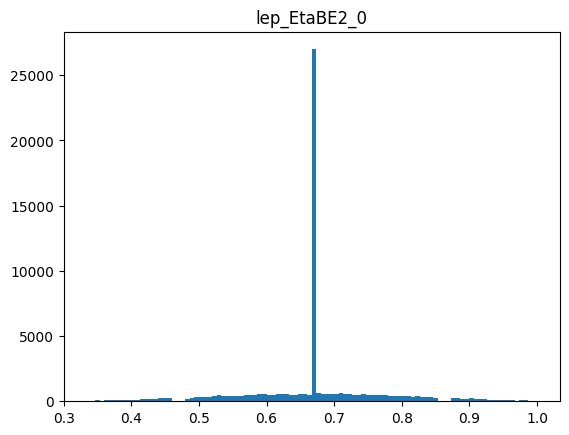

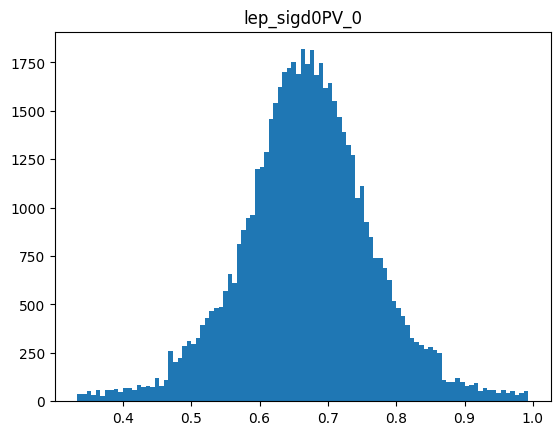

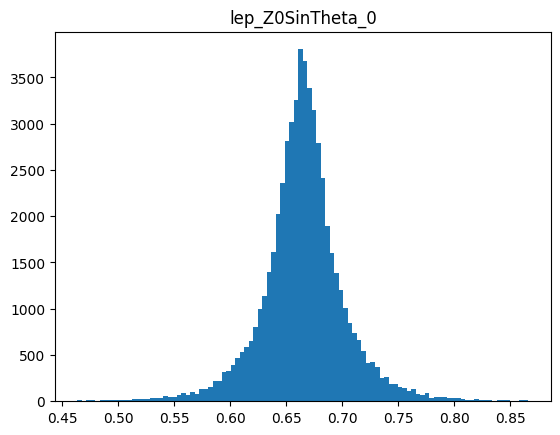

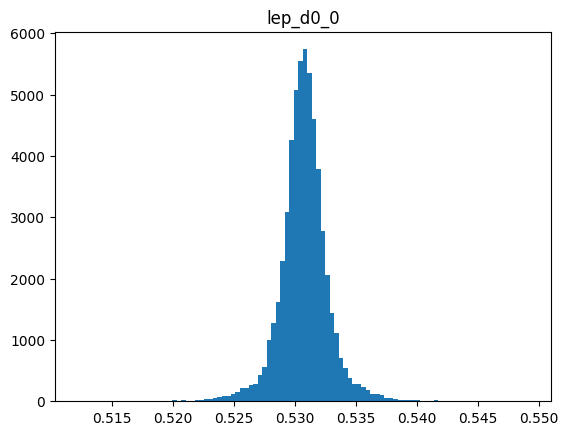

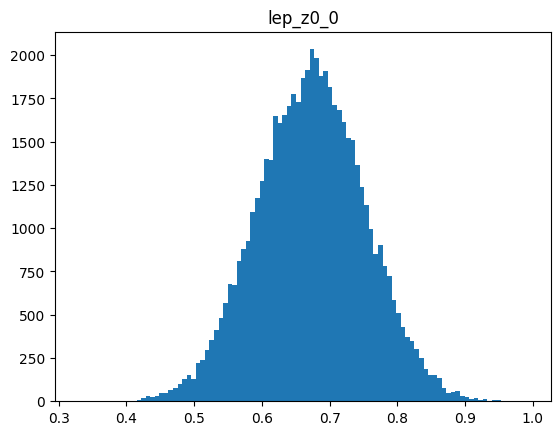

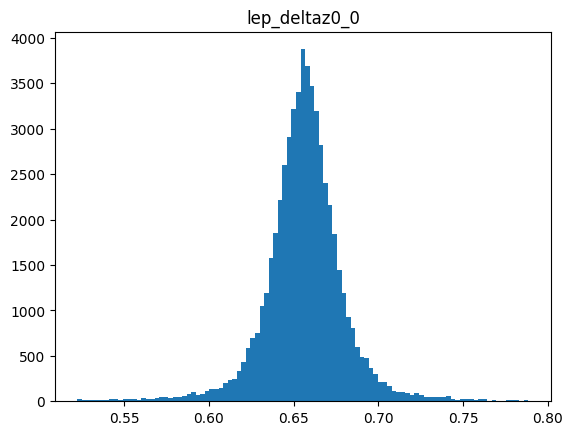

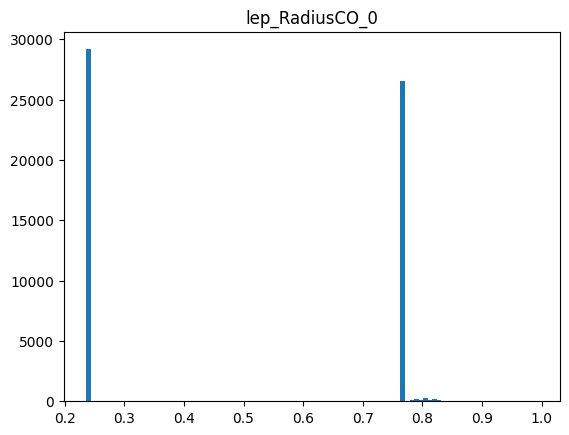

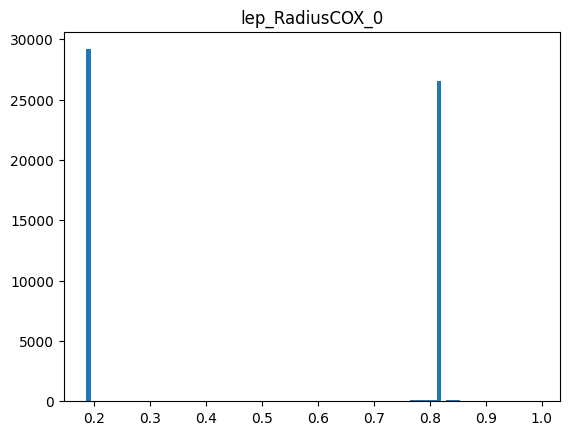

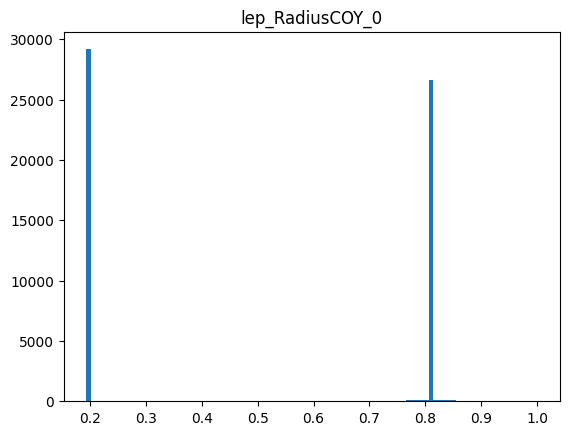

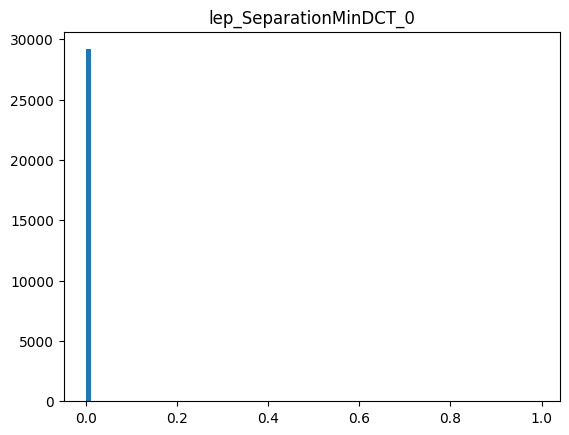

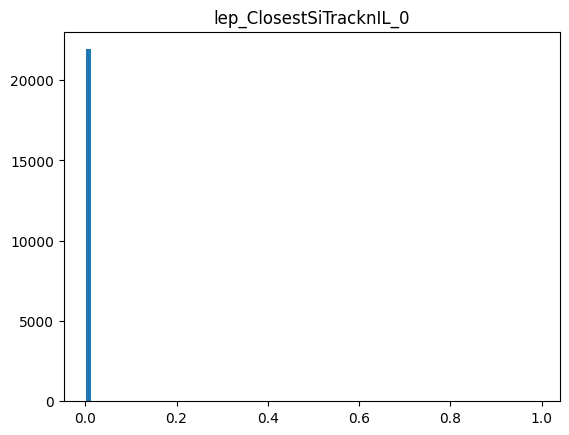

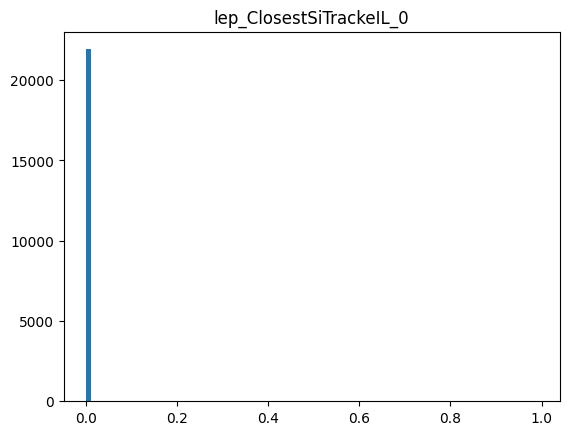

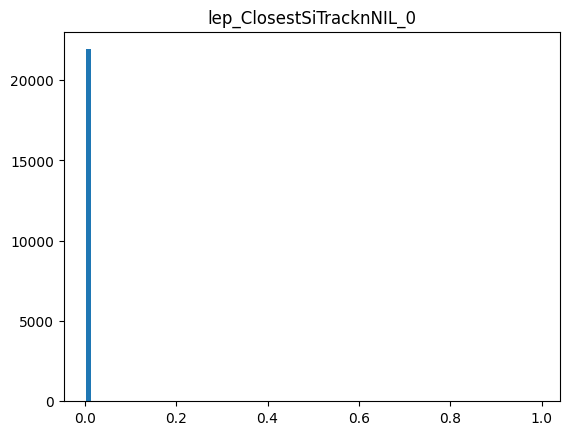

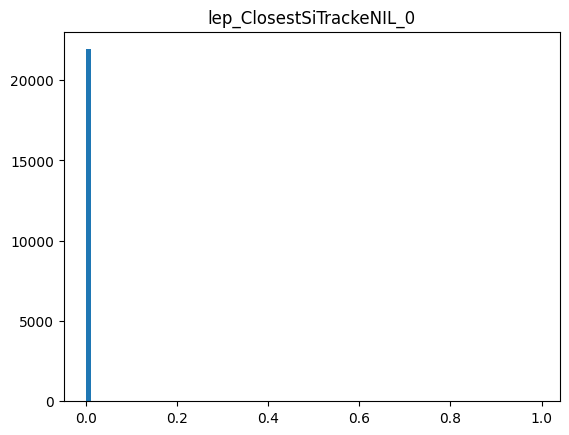

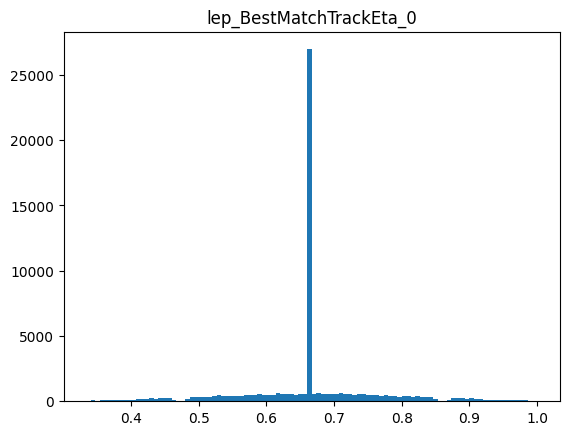

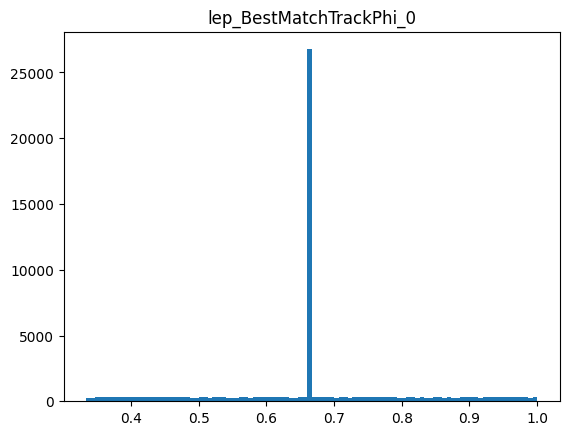

In [47]:
for i in range(0, 20):
    paint(keys[i], 100, combined_data[keys[i]])

In [26]:
combined_data['lep_vz_0']

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [28]:
combined_data['taus_DL1r_0']

array([-0.00201005, -0.00201005, -0.00201005, ..., -0.00201005,
       -0.00201005, -0.00201005], dtype=float32)

In [27]:
globals_min

{'jet_pt': 0.5028664,
 'jet_eta': 0.3333255,
 'jet_phi': 0.33332583,
 'jet_e': 0.501946,
 'lep_Pt_0': 0.50006306,
 'lep_E_0': 0.5000095,
 'lep_Eta_0': 0.33335674,
 'lep_Phi_0': 0.3333429,
 'lep_EtaBE2_0': 0.333319,
 'lep_sigd0PV_0': 0.33336735,
 'lep_Z0SinTheta_0': 0.47150606,
 'lep_d0_0': 0.64331234,
 'lep_z0_0': 0.3776684,
 'lep_vz_0': 0.0,
 'lep_deltaz0_0': 0.57464975,
 'lep_RadiusCO_0': 0.24121885,
 'lep_RadiusCOX_0': 0.22022577,
 'lep_RadiusCOY_0': 0.21749033,
 'lep_SeparationMinDCT_0': 0.000986952,
 'lep_ClosestSiTracknIL_0': 0.001994018,
 'lep_ClosestSiTrackeIL_0': 0.000999001,
 'lep_ClosestSiTracknNIL_0': 0.0029850747,
 'lep_ClosestSiTrackeNIL_0': 0.000999001,
 'lep_BestMatchTrackEta_0': 0.33270687,
 'lep_BestMatchTrackPhi_0': 0.33334008,
 'lep_BestMatchTrackD0_0': 0.61594856,
 'lep_BestMatchTrackZ0_0': 0.35097268,
 'lep_BestMatchTrackQ_0': 0.33333334,
 'lep_ClosestSiTrackEta_0': 0.0025635234,
 'lep_ClosestSiTrackD0_0': 0.020290533,
 'lep_ClosestSiTrackZ0_0': 0.12853768,
 'lep_

In [28]:
globals_max

{'jet_pt': 0.5950596,
 'jet_eta': 1.0,
 'jet_phi': 1.0,
 'jet_e': 0.6423531,
 'lep_Pt_0': 1.0,
 'lep_E_0': 1.0,
 'lep_Eta_0': 1.0,
 'lep_Phi_0': 1.0,
 'lep_EtaBE2_0': 1.0,
 'lep_sigd0PV_0': 1.0,
 'lep_Z0SinTheta_0': 0.8621603,
 'lep_d0_0': 0.68306327,
 'lep_z0_0': 0.9212938,
 'lep_vz_0': 0.0,
 'lep_deltaz0_0': 0.79405785,
 'lep_RadiusCO_0': 1.0,
 'lep_RadiusCOX_0': 1.0,
 'lep_RadiusCOY_0': 1.0,
 'lep_SeparationMinDCT_0': 1.0,
 'lep_ClosestSiTracknIL_0': 1.0,
 'lep_ClosestSiTrackeIL_0': 1.0,
 'lep_ClosestSiTracknNIL_0': 1.0,
 'lep_ClosestSiTrackeNIL_0': 1.0,
 'lep_BestMatchTrackEta_0': 1.0,
 'lep_BestMatchTrackPhi_0': 1.0,
 'lep_BestMatchTrackD0_0': 0.6777674,
 'lep_BestMatchTrackZ0_0': 0.94327337,
 'lep_BestMatchTrackQ_0': 1.0,
 'lep_ClosestSiTrackEta_0': 1.0,
 'lep_ClosestSiTrackD0_0': 1.0,
 'lep_ClosestSiTrackZ0_0': 1.0,
 'lep_ClosestSiTrackQ_0': 1.0,
 'lep_chargeIDBDTLoose_0': 1.0,
 'lep_ID_1': 1.0,
 'lep_Pt_1': 0.59640545,
 'lep_E_1': 0.62143403,
 'lep_Eta_1': 1.0,
 'lep_Phi_1': 1.

In [27]:
from matplotlib.backends.backend_pdf import PdfPages

In [33]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
pp = PdfPages('plots3.pdf')
for i in keys[201:]:
    fig = paint(i, 100, combined_data[i])
    plt.savefig(pp, format='pdf')
pp.close()

In [48]:
np.save("signal_data.npy", combined_data)